# Рекомендательная система на основе ML

## Загрузка библиотек

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(style="whitegrid", font_scale=1)

## Загрузка файлов

In [3]:
root_path = os.getcwd() # directory of the .ipynb file
dir_path = os.path.join(root_path, "data") # "root_path/data/" - directory of data files

### Разговоры сотрудников

In [4]:
communications = pd.read_csv(os.path.join(dir_path, 'communications.csv'), sep=';')
communications["communication_dt"] = pd.to_datetime(communications["communication_dt"])
communications

,communication_id,communication_dt,employee_id,communication_score,util_flg
0,177074281189583840,2023-02-07,269d837a-fada-308d-d4ae-ab28ca2d57e4,85,0
1,189925315406757324,2023-07-29,e6384711-4917-13d2-9bc6-3fc5eeb5ba4f,100,0
2,321818238739717242,2023-09-06,ab541d87-4c7b-c19a-b776-42849e02b89f,43,1
3,192259329962028989,2023-06-19,0a0a0c8a-aa00-ade5-0f74-a3f0ca981ed7,100,1
4,705274671052151857,2023-08-11,f93882cb-d8fc-7fb7-94c1-011d63be6fb6,46,0
...,...,...,...,...,...
5345241,599370382447053584,2023-10-26,e7f8a7fb-0b77-bcb3-b283-af5be021448f,59,1
5345242,819742840193184849,2023-02-28,01386bd6-d8e0-91c2-ab4c-7c7de644d37b,84,1
5345243,987315956981656955,2023-09-10,56f9f889-06ae-bf4a-d985-aaec7fa01313,63,1
5345244,615894087498427329,2023-03-13,70feb62b-69f1-6e02-38f7-41fab228fec2,100,1


In [5]:
communications.sort_values(by='communication_dt', inplace=True)
communications.reset_index(drop=True, inplace = True)
communications

,communication_id,communication_dt,employee_id,communication_score,util_flg
0,265773861079506507,2023-01-01,cf2226dd-d41b-1a2d-0ae5-1dab54d32c36,0,0
1,278568857626326381,2023-01-01,7f5d04d1-89df-b634-e6a8-5bb9d9adf21e,68,1
2,466811215985540640,2023-01-01,04ecb1fa-2850-6ccb-6f72-b12c0245ddbc,0,0
3,187483347234781892,2023-01-01,af3303f8-52ab-eccd-7930-68486a391626,100,0
4,47065300189886434,2023-01-01,16026d60-ff9b-5441-0b34-35b403afd226,0,1
...,...,...,...,...,...
5345241,450688130713775377,2023-12-20,13fe9d84-310e-77f1-3a6d-184dbf1232f3,54,1
5345242,676177508851450260,2023-12-20,17e62166-fc85-86df-a4d1-bc0e1742c08b,100,1
5345243,907002575277873705,2023-12-20,c54e7837-e0cd-0ced-286c-b5995327d1ab,73,0
5345244,79469263475673536,2023-12-20,afda3322-45e2-af43-1fb7-b672a68b659d,100,1


### Информация о сотрудниках

In [6]:
employees = pd.read_csv(os.path.join(dir_path, 'employees.csv'), sep=';')
employees

,employee_id,sex,region,age,head_employee_id,exp_days,edu_degree,department_id,work_online_flg
0,0f840be9-b8db-4d3f-bd5b-a2ce59211f55,M,4,36,c81e728d-9d4c-2f63-6f06-7f89cc14862c,734,0,2,1
1,ac1dd209-cbcc-5e5d-1c6e-28598e8cbbe8,M,4,32,93db85ed-909c-1383-8ff9-5ccfa94cebd9,654,0,2,1
2,a8c88a00-55f6-36e4-a163-a5e3d16adab7,F,5,34,9a115815-4dfa-42ca-ddbd-0694a4e9bdc8,276,1,2,1
3,c91591a8-d461-c286-9b9f-535ded3e213e,F,4,33,9f61408e-3afb-633e-50cd-f1b20de6f466,50,2,0,1
4,bc731692-9fe1-545b-f0b9-8d114ee3ecb8,M,0,33,a97da629-b098-b75c-294d-ffdc3e463904,274,1,2,1
...,...,...,...,...,...,...,...,...,...
2376,d707329b-ece4-55a4-62b5-8ce00d1194c9,M,4,26,d67d8ab4-f4c1-0bf2-2aa3-53e27879133c,177,0,2,1
2377,d3d94468-02a4-4259-755d-38e6d163e820,M,0,26,202cb962-ac59-075b-964b-07152d234b70,108,2,1,0
2378,a64c94ba-af36-8e18-40a1-324e839230de,F,0,35,67c6a1e7-ce56-d3d6-fa74-8ab6d9af3fd7,1018,2,2,0
2379,82cec960-96d4-281b-7c95-cd7e74623496,F,4,30,7647966b-7343-c290-4867-3252e490f736,372,0,2,1


### Информация о пройденных курсах

In [7]:
courses_passing = pd.read_csv(os.path.join(dir_path, 'courses_passing.csv'), sep=';')
courses_passing['start_dt'] = pd.to_datetime(courses_passing['start_dt'])
courses_passing['last_activity_dt'] = pd.to_datetime(courses_passing['last_activity_dt'])
courses_passing

,course_id,employee_id,pass_frac,start_dt,last_activity_dt,end_dt,educ_duration_days
0,24,53ed35c7-4a2e-c275-b837-374f04396c03,1.00,2023-01-30,2023-02-05,2023-02-05 00:00:00,6.0
1,83,202cb962-ac59-075b-964b-07152d234b70,1.00,2023-08-29,2023-09-10,2023-09-10 00:00:00,12.0
2,4,05f971b5-ec19-6b8c-65b7-5d2ef8267331,1.00,2023-07-29,2023-08-09,2023-08-09 00:00:00,11.0
3,79,f4a331b7-a22d-1b23-7565-d8813a34d8ac,1.00,2023-05-30,2023-06-09,2023-06-09 00:00:00,10.0
4,6,aba3b6fd-5d18-6d28-e06f-f97135cade7f,1.00,2023-07-12,2023-07-22,2023-07-22 00:00:00,10.0
...,...,...,...,...,...,...,...
10945,49,3147da8a-b4a0-437c-15ef-51a5cc7f2dc4,1.00,2023-05-11,2023-05-18,2023-05-18 00:00:00,7.0
10946,16,00e26af6-ac3b-1c1c-49d7-c3d79c60d000,1.00,2023-05-08,2023-05-20,2023-05-20 00:00:00,12.0
10947,40,e5b294b7-0c96-47dc-f804-d7baa1903918,1.00,2023-03-30,2023-04-13,2023-04-13 00:00:00,14.0
10948,24,fb89705a-e6d7-43bf-1e84-8c206e16a1d7,0.05,2023-05-05,2023-05-08,NaN,NaN


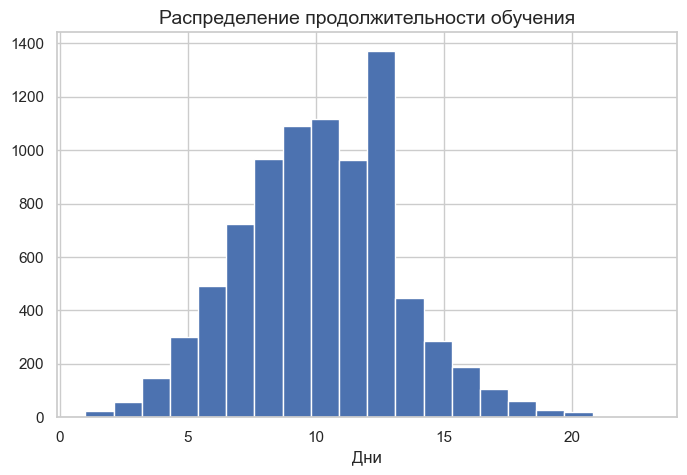

In [8]:
plt.figure(figsize=(8, 5))
plt.hist(courses_passing.dropna().sort_values(by='educ_duration_days').reset_index()['educ_duration_days'], bins=20)
plt.xlabel("Дни")
plt.title('Распределение продолжительности обучения', fontsize=14)
plt.show()

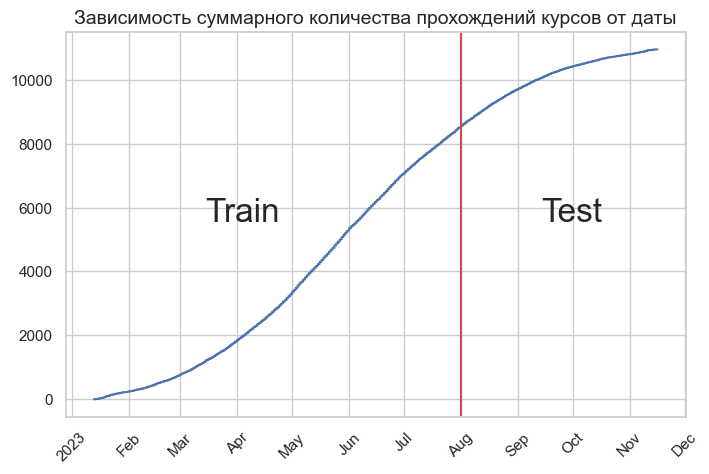

In [9]:
import matplotlib.dates as mdates

courses_passing.sort_values(by='last_activity_dt').reset_index()
plt.figure(figsize=(8, 5))
plt.plot(courses_passing.sort_values(by='last_activity_dt').reset_index()['last_activity_dt'], np.arange(courses_passing.shape[0]))
plt.title('Зависимость суммарного количества прохождений курсов от даты', fontsize=14)

plt.gca().xaxis.set_major_formatter(mdates.ConciseDateFormatter(plt.gca().xaxis.get_major_locator())) 
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 
plt.gca().xaxis.set_tick_params(rotation = 45)

plt.axvline(pd.to_datetime("2023-08-01"), color='r', alpha=1.0)
#plt.grid(False)
plt.figtext(0.3, 0.5, "Train", fontsize=24)
plt.figtext(0.72, 0.5, "Test", fontsize=24)

plt.savefig("Train_test.jpg")

plt.show()

Тестировать модели можно на данных звонков с 1 августа 2023 г.

In [10]:
print('Среднее количество прохождений курсов работниками из числа прошедших хотя бы 1 курс:', round(
    courses_passing.employee_id.value_counts().mean(), 1))

Среднее количество прохождений курсов работниками из числа прошедших хотя бы 1 курс: 6.2


### Информация о курсах

In [11]:
courses_info = pd.read_csv(os.path.join(dir_path, 'courses_info.csv'), sep=';')
courses_info

,course_id,course_nm
0,3,Улучшение качества обслуживания клиентов: Осно...
1,76,Как эффективно использовать психологию в обслу...
2,22,Эффективное обучение клиентов в использовании ...
3,53,Как эффективно реагировать на изменения потреб...
4,7,Построение долгосрочных отношений с клиентами:...
...,...,...
87,0,Основы клиентского сервиса: Практический подход
88,14,Повышение лояльности клиентов через качественн...
89,5,Проактивное обслуживание клиентов: Ключевые ст...
90,26,Использование аналитики данных для оптимизации...


In [12]:
courses_info.sort_values(by='course_id', inplace=True)
courses_info.reset_index(drop=True, inplace = True)
courses_info

,course_id,course_nm
0,0,Основы клиентского сервиса: Практический подход
1,1,Эффективное взаимодействие с клиентами: Техник...
2,2,Мастерство общения с клиентами: Практические н...
3,3,Улучшение качества обслуживания клиентов: Осно...
4,4,Искусство управления жалобами и конфликтами с ...
...,...,...
87,87,Эффективное проведение клиентских опросов и ис...
88,88,Создание индивидуальных планов обслуживания дл...
89,89,Развитие навыков адаптации к различным типам к...
90,90,Эффективное внедрение и использование чат-бото...


## Подготовка обучающей выборки

In [13]:
def build_time_series(data_communications, score_column='communication_score'):
    '''
    Создание временных рядов score для каждого работника
    input:
    data_communications - Данные о разговорах сотрудников
    score_column - Критерий вычисления score: 'communication_score' или 'util_flg'
    
    output:
    progresses_communication_score - массив временных рядов score для каждого работника
    dates - массив дат коммуникаций в колл центре для каждого пользователя
    employees_dict - словарь, кодирующий id работника в число
    '''
    
    if score_column != 'communication_score' and score_column != 'util_flg':
        raise KeyError()
        
    grouped_communications = data_communications.groupby(
        ['employee_id', 'communication_dt'], as_index=False)[score_column].mean()
    employee_id = ""
    progresses_communication_score = []
    dates = []
    employees_dict = {}
    index = 0
    for i in range(grouped_communications.shape[0]):        
        if grouped_communications.loc[i, 'employee_id'] != employee_id:
            employee_id = grouped_communications.loc[i, 'employee_id']
            employees_dict[employee_id] = index
            index += 1
            progresses_communication_score.append([])
            dates.append([])
            
        progresses_communication_score[-1].append(grouped_communications.loc[i, score_column])
        dates[-1].append(grouped_communications.loc[i, 'communication_dt'])
        
    return employees_dict, progresses_communication_score, dates


def gaussian_window(tau, time_series, date_arr, date_start, date_end, degree=1, bias=0):
    '''
    Расчет разницы score для определнной даты, отвечающий за раздел временного ряда на период до и после.
    Окно работает в две стороны от даты и имеет гауссовcrую или экспоненциальную форму
    input:
    tau - характерное время затухания экспоненты или гауссовской функции
    time_series - временной ряд одного работника
    date_arr - массив дат коммунникаций одного работника
    date_start - дата начала курса
    date_end - дата окончания курса (или последней активности)
    degree - степень экспоненциального затухания учета score
    bias - день наибольшего веса score ("пика") после прохождения курса 
    
    output:
    (score_after - score_before) - разница score из-за появления события
    '''
    def binary_search(date_arr, date_check):
        '''
        Обычный бинарный поиск
        '''
        low = 0
        high = len(date_arr) - 1
        while low < high:
            mid = (low + high) // 2
            guess = date_arr[mid]
            if guess >= date_check:
                high = mid
            else:
                low = mid + 1
        return mid
    
    start = binary_search(date_arr, date_start)
    end = binary_search(date_arr, date_end)

    delta_days_start = np.array([abs((date_i - date_start).days) for date_i in date_arr[:start]])
    delta_days_end = np.array([abs((date_i - date_end).days) for date_i in date_arr[end+1:]])

    scores_before = time_series[:start]
    weights_before = np.exp(- (delta_days_start / tau) ** degree)
    smooth_score_before = np.sum(scores_before * weights_before) / np.sum(weights_before)

    scores_after = time_series[end+1:]
    weights_after = np.exp(- np.abs((delta_days_end - bias) / tau) ** degree)
    smooth_score_after = np.sum(scores_after * weights_after) / np.sum(weights_after)
    
    return smooth_score_after - smooth_score_before


In [14]:
def build_ML_dataset(data_course_passing, arr_time_series, date_arr,
                     employees_dict, tau, start_test_date, employees_vectors):
    
    data_course_passing_train = data_course_passing[data_course_passing['last_activity_dt'] < start_test_date].reset_index(drop=True)
    data_course_passing_test = data_course_passing[data_course_passing['last_activity_dt'] >= start_test_date].reset_index(drop=True)
    
    courses_num = data_course_passing['course_id'].max() + 1
    employee_vector_dim = employees_vectors.shape[1]
    
    def build_X_y(data_course_passing, arr_time_series, date_arr, employees_dict, tau):
        X = np.zeros((data_course_passing.shape[0], employees_vectors.shape[1] + courses_num))
        y = np.zeros(data_course_passing.shape[0])

        experience_mark_date = pd.to_datetime("2023-01-01")
        
        for row in range(data_course_passing.shape[0]):
            course_id, employee_id, date_start, date_end = list(data_course_passing.iloc[row, :])
            index = employees_dict[employee_id]
            y[row] = gaussian_window(tau, arr_time_series[index], date_arr[index], date_start, date_end)
            X[row, 0:employee_vector_dim] = employees_vectors[index, :]
            X[row, employee_vector_dim + course_id] += 1 # OHE для курса, векторизация курса может быть более эффективной
            X[row, 1] += (date_start - experience_mark_date).days # добавляем опыт, набранный с начала года
 
        return X, y
    
    X_train, y_train = build_X_y(data_course_passing_train, arr_time_series, date_arr, employees_dict, tau)
    X_test, y_test = build_X_y(data_course_passing_test, arr_time_series, date_arr, employees_dict, tau)

    max_elements = np.max(X_train[:, 0:2], axis=0)
    X_train[:, 0:2] = X_train[:, 0:2] / max_elements
    X_test[:, 0:2] = X_test[:, 0:2] / max_elements
    
    return X_train, y_train, X_test, y_test, max_elements[0], max_elements[1]
    
    

In [15]:
def build_random_scores(data_course_passing, arr_time_series, date_arr, tau, rand_employee=False, rand_date=False):
    y = np.zeros(data_course_passing.shape[0])
    
    for row in range(data_course_passing.shape[0]):
        course_id, employee_id, date_start, date_end = list(data_course_passing.iloc[row, :])
        index = employees_dict[employee_id]
        
        if rand_employee:
            index=np.random.randint(0, len(arr_time_series))
            while date_arr[index][1] >= date_start or date_arr[index][-2] <= date_end:
                index=np.random.randint(0, len(arr_time_series))

        if rand_date:
            random_dates_index = np.random.randint(0, data_course_passing.shape[0])
            date_start, date_end = list(data_course_passing.iloc[random_dates_index, :])[-2:]
            
            while date_arr[index][1] >= date_start or date_arr[index][-2] <= date_end:
                random_dates_index = np.random.randint(0, data_course_passing.shape[0])
                date_start, date_end = list(data_course_passing.iloc[random_dates_index, :])[-2:]
            
        y[row] = gaussian_window(tau, arr_time_series[index], date_arr[index], date_start, date_end)

    return y

### Параметры подготовки данных

In [16]:
score_column = 'communication_score' # целевой показатель для рекомендаций курсов
#score_column = 'util_flg'
tau = 14 # характерное время учета прироста score после прохождения курса (в днях)
threshold = 0.8 # часть курса, при прохождении которой он учитывается как пройденный целиком (иначе - как не проходившийся)

start_test_date = pd.to_datetime("2023-08-01") # граница между обучающей и тестовой выборками

### Фильтрация прохождений курсов

In [17]:
filtered_courses_passing = courses_passing[courses_passing.pass_frac >= threshold].reset_index(drop=True)
filtered_courses_passing = filtered_courses_passing[['course_id', 'employee_id', 'start_dt', 'last_activity_dt']]
filtered_courses_passing

,course_id,employee_id,start_dt,last_activity_dt
0,24,53ed35c7-4a2e-c275-b837-374f04396c03,2023-01-30,2023-02-05
1,83,202cb962-ac59-075b-964b-07152d234b70,2023-08-29,2023-09-10
2,4,05f971b5-ec19-6b8c-65b7-5d2ef8267331,2023-07-29,2023-08-09
3,79,f4a331b7-a22d-1b23-7565-d8813a34d8ac,2023-05-30,2023-06-09
4,6,aba3b6fd-5d18-6d28-e06f-f97135cade7f,2023-07-12,2023-07-22
...,...,...,...,...
9060,71,298923c8-1900-45e9-1288-b430794814c4,2023-06-23,2023-07-08
9061,49,3147da8a-b4a0-437c-15ef-51a5cc7f2dc4,2023-05-11,2023-05-18
9062,16,00e26af6-ac3b-1c1c-49d7-c3d79c60d000,2023-05-08,2023-05-20
9063,40,e5b294b7-0c96-47dc-f804-d7baa1903918,2023-03-30,2023-04-13


### Создание временных рядов оценок работников

In [18]:
%%time
employees_dict, progresses_communication_score, dates = build_time_series(
    communications, score_column)

CPU times: total: 25.1 s
Wall time: 25.1 s


### Преобразование данных о работниках для обучения моделей

In [19]:
employees_attributes = employees.copy()
employees_attributes['employee_index'] = employees_attributes['employee_id'].apply(lambda x: employees_dict[x])
employees_attributes = employees_attributes.sort_values('employee_index').reset_index(drop=True)
employees_attributes.drop(columns=['employee_id', 'employee_index', 'head_employee_id'], inplace=True)
employees_attributes

,sex,region,age,exp_days,edu_degree,department_id,work_online_flg
0,M,0,28,140,2,2,0
1,F,3,29,378,1,1,1
2,F,0,24,452,2,2,1
3,M,0,30,163,1,2,1
4,M,4,34,46,1,1,0
...,...,...,...,...,...,...,...
2376,F,7,25,395,2,1,1
2377,M,4,32,333,1,2,1
2378,F,6,38,362,1,1,0
2379,M,3,27,558,0,1,1


In [20]:
employees_attributes = pd.get_dummies(employees_attributes, columns = ['department_id', 'edu_degree', 'region'])
employees_attributes

,sex,age,exp_days,work_online_flg,department_id_0,department_id_1,department_id_2,edu_degree_0,edu_degree_1,edu_degree_2,region_0,region_1,region_2,region_3,region_4,region_5,region_6,region_7
0,M,28,140,0,False,False,True,False,False,True,True,False,False,False,False,False,False,False
1,F,29,378,1,False,True,False,False,True,False,False,False,False,True,False,False,False,False
2,F,24,452,1,False,False,True,False,False,True,True,False,False,False,False,False,False,False
3,M,30,163,1,False,False,True,False,True,False,True,False,False,False,False,False,False,False
4,M,34,46,0,False,True,False,False,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,F,25,395,1,False,True,False,False,False,True,False,False,False,False,False,False,False,True
2377,M,32,333,1,False,False,True,False,True,False,False,False,False,False,True,False,False,False
2378,F,38,362,0,False,True,False,False,True,False,False,False,False,False,False,False,True,False
2379,M,27,558,1,False,True,False,True,False,False,False,False,False,True,False,False,False,False


In [21]:
employees_attributes["male"] = employees_attributes["sex"].apply(lambda x: 1 if x == 'M' else 0)
employees_attributes.drop(columns = ['sex'], inplace = True)
employees_attributes

,age,exp_days,work_online_flg,department_id_0,department_id_1,department_id_2,edu_degree_0,edu_degree_1,edu_degree_2,region_0,region_1,region_2,region_3,region_4,region_5,region_6,region_7,male
0,28,140,0,False,False,True,False,False,True,True,False,False,False,False,False,False,False,1
1,29,378,1,False,True,False,False,True,False,False,False,False,True,False,False,False,False,0
2,24,452,1,False,False,True,False,False,True,True,False,False,False,False,False,False,False,0
3,30,163,1,False,False,True,False,True,False,True,False,False,False,False,False,False,False,1
4,34,46,0,False,True,False,False,True,False,False,False,False,False,True,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,25,395,1,False,True,False,False,False,True,False,False,False,False,False,False,False,True,0
2377,32,333,1,False,False,True,False,True,False,False,False,False,False,True,False,False,False,1
2378,38,362,0,False,True,False,False,True,False,False,False,False,False,False,False,True,False,0
2379,27,558,1,False,True,False,True,False,False,False,False,False,True,False,False,False,False,1


In [22]:
employees_vectors = employees_attributes.to_numpy(dtype = np.float32)
employees_vectors

array([[ 28., 140.,   0., ...,   0.,   0.,   1.],
       [ 29., 378.,   1., ...,   0.,   0.,   0.],
       [ 24., 452.,   1., ...,   0.,   0.,   0.],
       ...,
       [ 38., 362.,   0., ...,   1.,   0.,   0.],
       [ 27., 558.,   1., ...,   0.,   0.,   1.],
       [ 28., 583.,   0., ...,   0.,   0.,   0.]], dtype=float32)

### Получение  выборок для обучения и тестирования

In [23]:
%%time
X_train, y_train, X_test, y_test, max_age, max_exp = build_ML_dataset(filtered_courses_passing, progresses_communication_score, dates, 
                                                    employees_dict, tau, start_test_date, employees_vectors)

CPU times: total: 6.39 s
Wall time: 6.38 s


In [24]:
y_courses = np.concatenate((y_train, y_test))
y_random_employee = build_random_scores(filtered_courses_passing, progresses_communication_score, dates, tau, True, False)
y_random_date = build_random_scores(filtered_courses_passing, progresses_communication_score, dates, tau, False, True)
y_full_random = build_random_scores(filtered_courses_passing, progresses_communication_score, dates, tau, True, True)

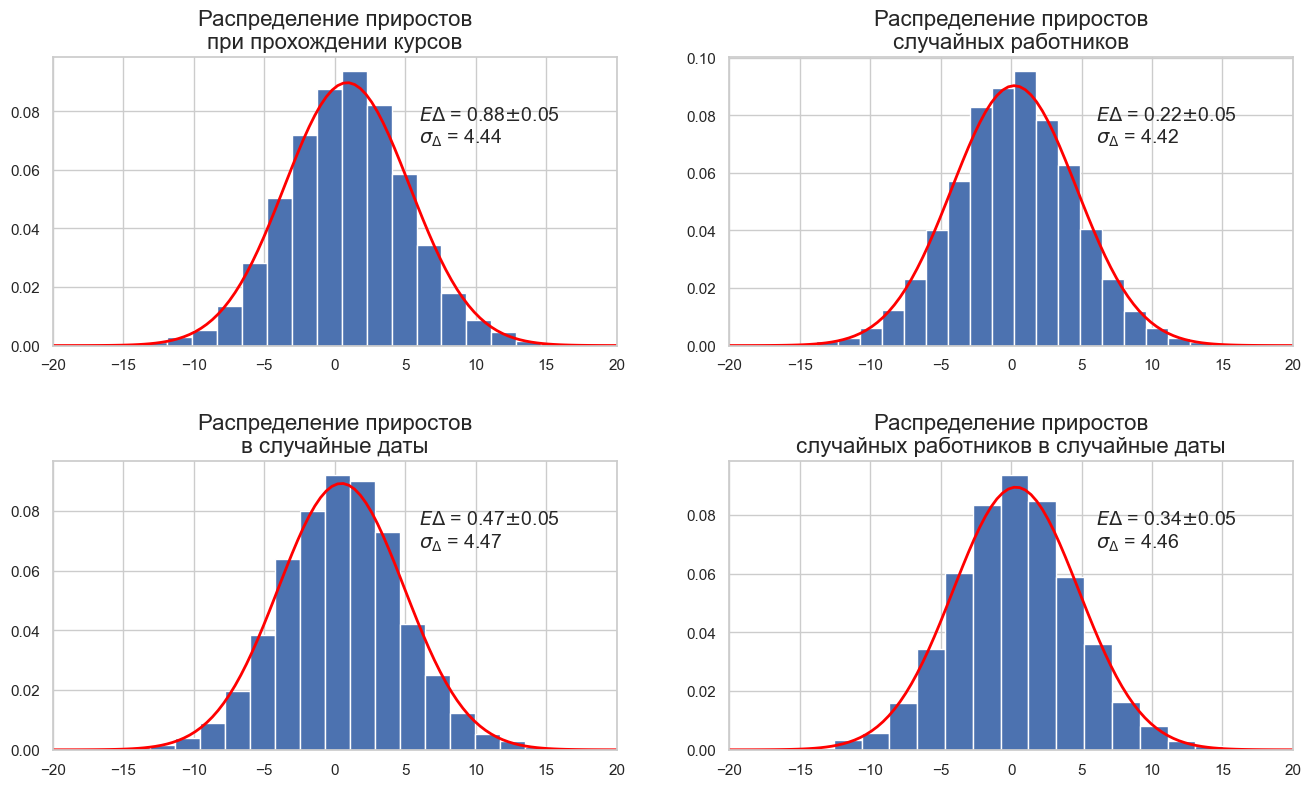

In [25]:
from scipy.stats import norm

fig, axes = plt.subplots(2, 2, figsize=(16, 9))
plt.subplots_adjust(hspace=0.4)
axes = axes.ravel()
y_sources = [y_courses, y_random_employee, y_random_date, y_full_random]
titles = ["Распределение приростов\nпри прохождении курсов",
          "Распределение приростов\nслучайных работников",
          "Распределение приростов\nв случайные даты",
          "Распределение приростов\nслучайных работников в случайные даты"]
for i in range(len(y_sources)):
    
    y = y_sources[i]
    title = titles[i]

    axes[i].set_xlim(-20, 20)
    
    y_mean = np.mean(y)
    y_std = np.std(y)
    mean_sigma = y_std / np.sqrt(y.size)
    
    axes[i].hist(y, bins=30, density=True)
    axes[i].annotate(f"$E\Delta$ = {y_mean:.2f}" + r"$\pm$" + f"{mean_sigma:.2f}\n" + f"$\sigma_\Delta$ = {y_std:.2f}",
                     (0.65, 0.7), xycoords='axes fraction', fontsize=14)
    mu, std = norm.fit(y)
    xmin, xmax = axes[i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)

    axes[i].set_title(title,  fontsize=16)
    
    axes[i].plot(x, p, 'red', linewidth=2)
    
plt.savefig("Распределения_приростов.jpg")
plt.show()
    

Вывод: прохождение курсов существенно (не в пределах погрешности) влияет на прирост рабочих показателей сотрудников

In [26]:
random_benchmark = np.mean(y_test)
random_benchmark

0.7269376338717711

Средний прирост от прохождения курсов на тестовой выборке чуть меньше, чем на полной выборке. Он будет бенчмарком для рекомендательных моделей.

Метрика полезности всех рассматриваемых далее рекомендательных моделей: $$ FVGK = \frac{\sum_{\Delta \in test} w_i (\Delta)  \Delta}{\sum_{\Delta \in test} w_i (\Delta)} $$

Если курс определен рекомендательной системой на позиции $k_\Delta$, то
$$w_i (\Delta) = \exp(-\frac{k_\Delta}{n}) ~,$$ где $n = 5$ - характерное число курсов, которые мы хотим рекомендовать наиболее эффективно.

Для случайных предсказаний матожидание этой метрики равно матожиданию отдельного прироста. Хорошая рекомендательная модель придает большим приростам больший вес, располагая на более высоких позициях в ранжированных списках

## Универсально рекомендуемые курсы

Для удобства разобьем выборки по курсам

In [27]:
def split_X_y(X, y, courses_num):

    X_subs = []
    y_subs = []

    features_num = X.shape[1] - courses_num
    for course_id in range(courses_num):
        vectors_num = np.sum(X[:, -(courses_num-course_id)]).astype(np.int32)

        X_sub = np.zeros((vectors_num, features_num))
        y_sub = np.zeros(vectors_num)

        next_index = 0

        for i in range(X.shape[0]):
            if X[i, -(courses_num-course_id)] == 1:
                X_sub[next_index, :] = X[i, 0:features_num]
                y_sub[next_index] = y[i]
                
                next_index += 1

        X_subs.append(X_sub)
        y_subs.append(y_sub)


    return X_subs, y_subs    

In [28]:
%%time
courses_num = filtered_courses_passing['course_id'].max() + 1
X_train_subs, y_train_subs = split_X_y(X_train, y_train, courses_num)
X_test_subs, y_test_subs = split_X_y(X_test, y_test, courses_num)

CPU times: total: 250 ms
Wall time: 210 ms


### Лучшие курсы тренировочной выборки

In [29]:
courses_mean_train = np.array([np.mean(y_train_sub) for y_train_sub in y_train_subs])
n = 20
top_inds_train = np.flip(courses_mean_train.argsort())
for i in top_inds_train[:n]:
    print(f"{courses_info['course_nm'][i]}\t{courses_mean_train[i]:.3f}\t{y_train_subs[i].size}")    

Использование мультимедийных инструментов в клиентском сервисе	3.441	18
Управление персоналом в клиентском обслуживании: Лучшие практики	3.342	37
Ключевые аспекты обучения новых сотрудников в клиентском сервисе	2.678	42
Техники обслуживания международных клиентов: Культурные аспекты	2.590	28
Повышение лояльности клиентов через качественное обслуживание	2.373	93
Управление временем и приоритетами в клиентском обслуживании	2.291	71
Проектирование и внедрение программ лояльности для клиентов	1.948	80
Разработка стратегии обслуживания для разных сегментов рынка	1.933	12
Развитие навыков эмоционального интеллекта для клиентского сервиса	1.903	45
Интеграция клиентского сервиса с другими отделами компании	1.856	47
Тайм-менеджмент для специалистов по клиентскому сервису	1.854	64
Продвинутые методы анализа клиентской удовлетворенности	1.829	74
Развитие навыков переговоров и конфликтного разрешения в клиентском сервисе	1.809	31
Управление процессом рассмотрения и урегулирования жалоб клиентов	1.

### Лучшие курсы тестовой выборки

In [30]:
courses_mean_test = np.array([np.mean(y_test_sub) for y_test_sub in y_test_subs])
n = 20
top_inds_test = np.flip(courses_mean_test.argsort())
for i in top_inds_test[:n]:
    print(f"{courses_info['course_nm'][i]}\t{courses_mean_test[i]:.3f}\t{y_test_subs[i].size}")

Развитие навыков эмоционального интеллекта для клиентского сервиса	4.396	8
Разработка стратегии обслуживания для разных сегментов рынка	3.690	3
Инновационные подходы к клиентскому сервису: Лучшие практики	3.457	9
Как эффективно использовать психологию в обслуживании клиентов	3.412	8
Проектирование и внедрение программ лояльности для клиентов	2.996	20
Стратегии управления ожиданиями и эмоциями клиентов в цифровую эпоху	2.727	12
Интеграция клиентского сервиса с другими отделами компании	2.633	12
Ключевые аспекты обучения новых сотрудников в клиентском сервисе	2.133	17
Построение эффективной системы обратной связи с клиентами	1.982	20
Продвинутые техники работы с электронной почтой в клиентском обслуживании	1.976	22
Эффективное взаимодействие с клиентами: Техники и стратегии	1.849	53
Эффективное использование CRM-систем в клиентском сервисе	1.843	22
Анализ и управление клиентским опытом: Инструменты и методы	1.837	12
Создание позитивного опыта обслуживания клиентов	1.818	19
Управление ожи

### Общие лидеры тренировочной и тестовой выборок

In [31]:
top_top = np.intersect1d(top_inds_test[:n], top_inds_train[:n])

In [32]:
for i in top_top:
    print(f"{courses_info['course_nm'][i]}\t{courses_mean_test[i]:.3f}\t{courses_mean_train[i]:.3f}\t{y_test_subs[i].size}\t{y_train_subs[i].size}")

Ключевые аспекты обучения новых сотрудников в клиентском сервисе	2.133	2.678	17	42
Управление временем и приоритетами в клиентском обслуживании	1.654	2.291	23	71
Разработка стратегии обслуживания для разных сегментов рынка	3.690	1.933	3	12
Интеграция клиентского сервиса с другими отделами компании	2.633	1.856	12	47
Управление ожиданиями клиентов в условиях динамичного рынка	1.766	1.662	27	93
Развитие навыков эмоционального интеллекта для клиентского сервиса	4.396	1.903	8	45
Проектирование и внедрение программ лояльности для клиентов	2.996	1.948	20	80
Развитие навыков переговоров и конфликтного разрешения в клиентском сервисе	1.573	1.809	9	31
Продвинутые техники работы с электронной почтой в клиентском обслуживании	1.976	1.632	22	47


In [33]:
np.corrcoef(courses_mean_test, courses_mean_train)

array([[1.        , 0.19982299],
       [0.19982299, 1.        ]])

Вывод: рекомендации одних и тех же курсов, хорошо зарекомендовавших себя на тренировочной выборке, должны быть лучше случайных при оценке на тестовой

In [34]:
def top_courses_target_metric(top_inds_train, y_test_subs, courses_num, n):

    y_sum_benchmark = 0.0
    y_weight_benchmark = 0.0

    for i in range(courses_num):
        k = top_inds_train[i]
        weight = np.exp(-k / n)
    
        y_sum_benchmark += weight * np.sum(y_test_subs[k])
        y_weight_benchmark += weight * y_test_subs[k].size
        
    return y_sum_benchmark / y_weight_benchmark

In [35]:
n = 5
constant_recomendations_benchmark = top_courses_target_metric(top_inds_train, y_test_subs, courses_num, n)
constant_recomendations_benchmark

0.8957408208788096

Ранжирование курсов, соответствующее их среднему эффекту на тренировочной выборке, дало прирост метрики относительно случайных рекомендаций (среднего по тестовой выборке).

## Обучение персонализированных моделей

### Задача классификации

Некоторый порог прироста score в результате прохождения курса позволяет разделить все случаи на два класса: прохождение курса дало ощутимый эффект или нет. Затем рекомендательная система может отранжировать курсы по предсказанным моделью вероятностям того, что прохождение курса даст необходимый результат

In [36]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, roc_auc_score, confusion_matrix

In [37]:
courses_num = filtered_courses_passing['course_id'].max() + 1

In [38]:
q = 0.58 # прирост показателей работника свыше этого квантиля считается успешным

In [39]:
threshold = np.quantile(y_train, q)
threshold

1.8292462900065976

In [40]:
np.quantile(y_test, q)

1.4076789800715919

In [41]:
y_train_bin = np.array(y_train > threshold, dtype = np.int32)
y_test_bin = np.array(y_test > threshold, dtype = np.int32)

In [42]:
#основная метрика наших рекомендательных систем
def target_function_single_model(model, X_test, y_test, courses_num, n):

    total_y_sum = 0
    total_y_weight = 0

    for i in range(X_test.shape[0]):
        test_course = -1
        X = np.zeros((courses_num, X_test.shape[1]))
        for k in range(courses_num):
            X[k, :-courses_num] = X_test[i, :-courses_num]
            X[k, -courses_num+k] = 1
            if X_test[i, -courses_num+k] == 1:
                test_course = k

        success_probabilities = model.predict_proba(X)[:, 1]
        
        position = np.sum(success_probabilities > success_probabilities[test_course])
        
        #weight = 1.0 / (position + n)
        weight = np.exp(-(position / n))
        total_y_weight += weight
        total_y_sum += y_test[i] * weight

    return total_y_sum, total_y_weight, total_y_sum / total_y_weight

In [43]:
def train_test_classifier(model, X_train, y_train, X_test, y_test, y_train_bin, y_test_bin, courses_num, n):

    model.fit(X_train, y_train_bin)
    train_recall = recall_score(y_train_bin, model.predict(X_train))
    train_precision = precision_score(y_train_bin, model.predict(X_train))
    
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    plt.hist(y_pred_proba, bins=20)
    plt.title('Распределение предсказанных вероятностей\nуспешного прироста показателей', fontsize=14)
    plt.show()

    if np.sum(y_pred == 1) == 0:
        return None
    
    test_recall = recall_score(y_test_bin, y_pred)
    test_precision = precision_score(y_test_bin, y_pred)
    test_accuracy = accuracy_score(y_test_bin, y_pred)
    test_roc_auc = roc_auc_score(y_test_bin, y_pred_proba)
    
    print(f"train recall: {train_recall:.3f}, train precision: {train_precision:.3f}")
    print(f"test recall: {test_recall:.3f}, test precision: {test_precision:.3f}, test roc auc = {test_roc_auc:.3f}")
    print(f"test accuracy: {test_accuracy:.3f}")
    
    print("confusion matrix: ")
    print(confusion_matrix(y_test_bin, y_pred))
    
    avg_improvement = np.mean(y_test[y_pred == 1]) - np.mean(y_test)
    print(f"previous mean: {np.mean(y_test):+.3f}, std: {np.std(y_test):+.3f}")
    total_y_sum, total_y_weight, target = target_function_single_model(model, X_test, y_test, courses_num, n)
    print(f"target function: {target:+.3f}")

    return target
        

#### Логистическая регрессия

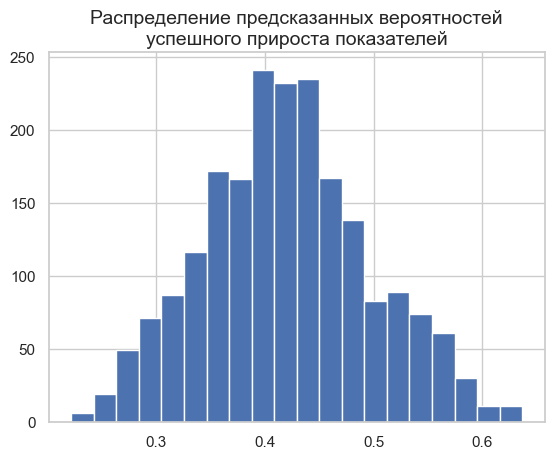

train recall: 0.201, train precision: 0.550
test recall: 0.177, test precision: 0.432, test roc auc = 0.514
test accuracy: 0.603
confusion matrix: 
[[1104  180]
 [ 637  137]]
previous mean: +0.727, std: +3.761
target function: +1.034


1.0342266905357376

In [44]:
from sklearn.linear_model import LogisticRegression

reg = 'l2'
C = 100.0
solver='liblinear'

model_logreg = LogisticRegression(penalty=reg, C=C, solver=solver)

train_test_classifier(model_logreg, X_train, y_train, X_test, y_test, y_train_bin, y_test_bin, courses_num, n)

#### Naive Bayes

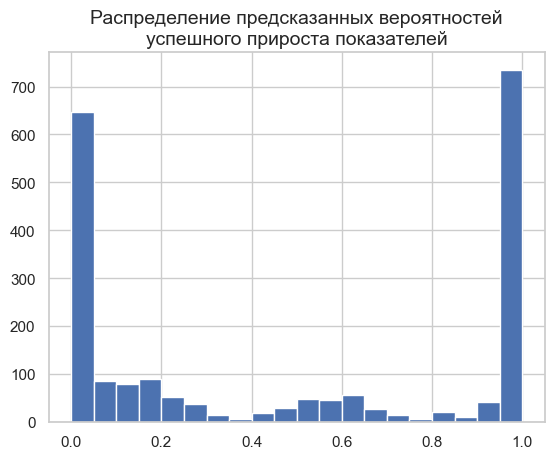

train recall: 0.552, train precision: 0.480
test recall: 0.477, test precision: 0.369, test roc auc = 0.513
test accuracy: 0.497
confusion matrix: 
[[653 631]
 [405 369]]
previous mean: +0.727, std: +3.761
target function: +1.576


1.5763741414931913

In [45]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()

train_test_classifier(model_nb, X_train, y_train, X_test, y_test, y_train_bin, y_test_bin, courses_num, n)

#### Случайный лес

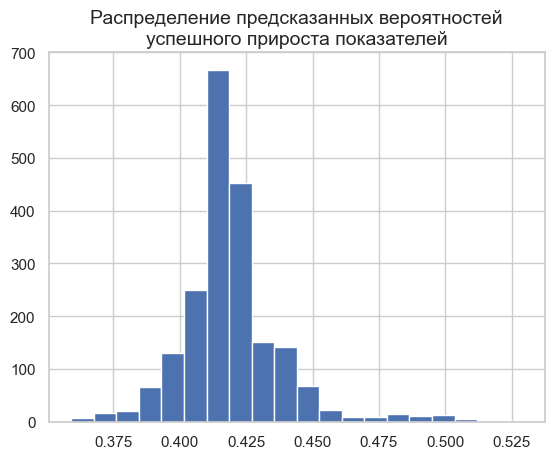

train recall: 0.024, train precision: 0.960
test recall: 0.005, test precision: 0.308, test roc auc = 0.514
test accuracy: 0.621
confusion matrix: 
[[1275    9]
 [ 770    4]]
previous mean: +0.727, std: +3.761
target function: +1.049


1.0489923705093334

In [46]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = 300
max_depth = 4
random_state = 42
max_samples = 0.5
max_features = 1.0

model_rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                              max_samples=max_samples, max_features=max_features, random_state=random_state)

train_test_classifier(model_rf, X_train, y_train, X_test, y_test, y_train_bin, y_test_bin, courses_num, n)

#### Градиентный бустинг

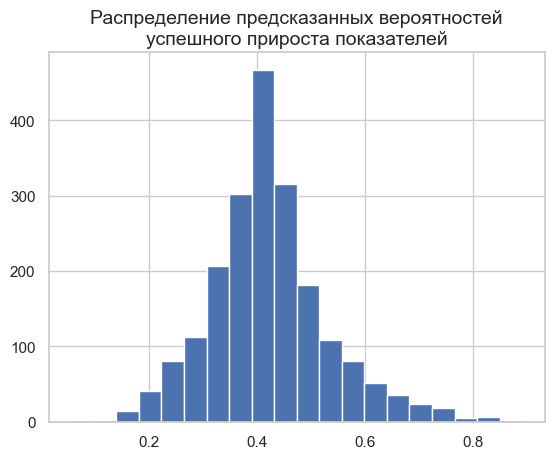

train recall: 0.381, train precision: 0.809
test recall: 0.199, test precision: 0.396, test roc auc = 0.507
test accuracy: 0.585
confusion matrix: 
[[1049  235]
 [ 620  154]]
previous mean: +0.727, std: +3.761
target function: +1.144


1.1439016957281656

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

n_estimators = 500
max_depth = 3
random_state = 42
lr = 0.1

model_gb = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                  learning_rate=lr, random_state=random_state)

train_test_classifier(model_gb, X_train, y_train, X_test, y_test, y_train_bin, y_test_bin, courses_num, n)

Персонализированные модели дают прирост метрики относительно универсальной модели, рекомендующей всем одни и те же курсы

## Выдача рекомендаций

Рекомендации будут даны на 1 января 2024 г. в виде ранжированных списков для каждого сотрудника. Они не учитывают то, что некоторые курсы ими уже были пройдены, и их следует исключить, пользуясь полной базой данных прохождений курсов

In [48]:
def top_courses_indices(employee_id, employees_dict, employees_vectors, courses_info, model, n=5):
    
    courses_number = courses_info.shape[0]
    employee_features_number = employees_vectors.shape[1]
    X = np.zeros((courses_number, employee_features_number + courses_number))
    
    employee_idx = employees_dict[employee_id]
    for i in range(courses_number):
        X[i, 0:employee_features_number] = employees_vectors[employee_idx, :]
        X[i, employee_features_number + i] = 1

        #прибавка года, нормировка в соответствии с подготовкой данных для обучения
        X[i, 0] += 1
        X[i, 0] /= max_age
        X[i, 1] += 365
        X[i, 1] /= max_exp
    
    success_probabilities = model.predict_proba(X)[:, 1]
    
    inds = success_probabilities.argsort()
    
    top_inds = inds[-1:-(n+1):-1]

    return top_inds

In [49]:
def top_courses(employee_id, employees_dict, employees_vectors, courses_info, model, n=5):
    
    top_inds = top_courses_indices(employee_id, employees_dict, employees_vectors, courses_info, model, n)
    
    top_courses_names = list(courses_info['course_nm'][top_inds])
    
    return top_courses_names

Полный список рекомендаций

In [50]:
def make_recommendations(employees, employees_vectors, employees_dict, courses_info, model):
    recommendations = dict()
    recommendations_indices = dict()
    for employee_idx in range(employees_vectors.shape[0]):
        employee_id = employees.loc[employee_idx, 'employee_id']

        top_inds = top_courses_indices(employee_id, employees_dict, employees_vectors, courses_info, model, courses_info.shape[0])
        recommendations_indices[employee_id] = top_inds
        recommendations[employee_id] = list(courses_info['course_nm'][top_inds])

    return recommendations, recommendations_indices        

Метрики разнообразия рекомендаций

In [51]:
def coverage(recommendations, top_n, courses_num):
    unique_recommendations = set()
    for rec_list in recommendations.values():
        for elem in rec_list[:top_n]:
            unique_recommendations.add(elem)

    return len(unique_recommendations) / courses_num

In [52]:
from sklearn.metrics.pairwise import cosine_similarity

In [53]:
def personalization(recommendations_indices, top_n, courses_num):

    rec_indices = np.array(list(recommendations_indices.values()))
    X = np.zeros((len(recommendations_indices), courses_num))
    for i in range(len(rec_indices)):
        indices = rec_indices[i]
        for ind in indices[:top_n]:
            X[i, ind] = 1
            
    cos_matrix = cosine_similarity(X, X)
    N = X.shape[0]
    mu = np.mean(cos_matrix)
    return 1 - (mu * N**2 + N) / (N**2 + N)

In [54]:
models = [model_logreg, model_nb, model_rf, model_gb]
models_names = ["Логистическая регрессия", "Наивный Байес", "Случайный лес", "Градиентный бустинг"]
for i in range(len(models)):
    model = models[i]
    name = models_names[i]

    recommendations, recommendations_indices = make_recommendations(employees, employees_vectors, employees_dict, courses_info, model)
    coverage_score = coverage(recommendations, 10, courses_num)
    personalization_score = personalization(recommendations_indices, 10, courses_num)

    print(f"Модель: {name}")
    print(f"Coverage: {coverage_score:.3f}")
    print(f"Personalization: {personalization_score:.3f}")

    print()

Модель: Логистическая регрессия
Coverage: 0.109
Personalization: 0.000

Модель: Наивный Байес
Coverage: 0.109
Personalization: 0.000

Модель: Случайный лес
Coverage: 0.326
Personalization: 0.218

Модель: Градиентный бустинг
Coverage: 0.587
Personalization: 0.593



Вывод: несмотря на учет признаков пользователей, логистическая регрессия и байсовский классификатор выдают пользователям одни и те же рекомендации, хоть и более грамотные, чем универсальная модель, что было видно из прироста основной метрики. Модель на основе градиентного бустинга сочетает в себе качество рекомендаций и гибкий учет особенностей сотрудников. Ее выберем в качестве основной.

In [55]:
model = model_gb
recommendations, recommendations_indices = make_recommendations(employees, employees_vectors, employees_dict, courses_info, model)

Посмотрим на отдельные рекомендации

In [56]:
for employee_idx in [10, 100, 1000]:
    employee_id = employees.loc[employee_idx, 'employee_id']
    print(f"Рекомендации для {employee_id}:")
    for course in top_courses(employee_id, employees_dict, employees_vectors, courses_info, model, 10):
        print(course)
        
    print()

Рекомендации для 8597a6cf-a74d-efcb-de30-47c891d78f90:
Управление персоналом в клиентском обслуживании: Лучшие практики
Использование социальных сетей для улучшения клиентского опыта
Ключевые аспекты обучения новых сотрудников в клиентском сервисе
Использование мультимедийных инструментов в клиентском сервисе
Создание уникального брендового опыта для клиентов
Продвинутые методы обслуживания VIP-клиентов
Управление временем и приоритетами в клиентском обслуживании
Развитие навыков переговоров и конфликтного разрешения в клиентском сервисе
Использование техник активного слушания в общении с клиентами
Проектирование и внедрение программ лояльности для клиентов

Рекомендации для 14d9e800-7c9b-41f5-7891-c48e07c23f57:
Управление персоналом в клиентском обслуживании: Лучшие практики
Эффективное управление временем в условиях повышенной нагрузки
Управление временем и приоритетами в клиентском обслуживании
Использование мультимедийных инструментов в клиентском сервисе
Развитие навыков эмоционал

Сохраним все рекомендации в файл

In [57]:
import json

with open('recommendations.json', 'w') as f:
    json.dump(recommendations, f)